<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 6 (midnight), 2025 -->

# Project 1 on Machine Learning, deadline October 6 (midnight), 2025
**Data Analysis and Machine Learning FYS-STK3155/FYS4155**, University of Oslo, Norway

Date: **September 2**

## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report.  The
links at
<https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects>
contain more information. There you can find examples of previous
reports, the projects themselves, how we grade reports etc. How to
write reports will also be discussed during the various lab
sessions. Please do ask us if you are in doubt.

When using codes and material from other sources, you should refer to
these in the bibliography of your report, indicating wherefrom you for
example got the code, whether this is from the lecture notes,
softwares like Scikit-Learn, TensorFlow, PyTorch or other sources. These sources
should always be cited correctly. How to cite some
of the libraries is often indicated from their corresponding GitHub
sites or websites, see for example how to cite Scikit-Learn at
<https://scikit-learn.org/dev/about.html>.

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

If you would like to study other data sets, feel free to propose other
sets. What we have proposed here are mere suggestions from our
side. If you opt for another data set, consider using a set which has
been studied in the scientific literature. This makes it easier for
you to compare and analyze your results. Comparing with existing
results from the scientific literature is also an essential element of
the scientific discussion.  The University of California at Irvine
with its Machine Learning repository at
<https://archive.ics.uci.edu/ml/index.php> is an excellent site to
look up for examples and
inspiration. [Kaggle.com](https://www.kaggle.com/) is an equally
interesting site. Feel free to explore these sites. When selecting
other data sets, make sure these are sets used for regression problems
(not classification).

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including Ordinary Least Squares (OLS) reegression, Ridge regression and LASSO regression.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

We will study how to fit polynomials to specific
one-dimensional functions (feel free to replace the suggested function with more complicated ones).

We will use Runge's function (see <https://en.wikipedia.org/wiki/Runge%27s_phenomenon> for a discussion).  The one-dimensional function we will study is

$$
f(x) = \frac{1}{1+25x^2}.
$$

Our first step will be to perform an OLS regression analysis of this
function, trying out a polynomial fit with an $x$ dependence of the
form $[x,x^2,\dots]$.  You can use a uniform distribution to set up the
arrays of values for $x \in [-1,1]$, or alternatively use a fixed step size.
Thereafter we will repeat many of the same steps when using the Ridge and Lasso regression methods,
introducing thereby a dependence on the hyperparameter  (penalty) $\lambda$.

We will also include bootstrap as a resampling technique in order to
study the so-called **bias-variance tradeoff**.  After that we will
include the so-called cross-validation technique.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import autograd.numpy as np
from autograd import grad

In [4]:
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{sansmathfonts}'
rcParams.update({'font.size': 10})

In [5]:
def saveplot(plotname):
    return plt.savefig("LaTeX/images/{}.pdf".format(str(plotname)))

### Part a : Ordinary Least Square (OLS) for the Runge function

We will generate our own dataset for abovementioned  function
$\mathrm{Runge}(x)$ function with $x\in [-1,1]$. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using for example the  pseudoinverse function **pinv** from  **Numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ up to  order $15$ or higher. Explore the dependence on the number of data points and the polynomial degree.

Evaluate the mean Squared error (MSE)

$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree 15).
Plot also the parameters $\theta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For the scaling  you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

---
**a1) Runge function dataset**

In [6]:
def Runge(x, noise=True):
    """ Computes Runge function with or without a normal distributed stochastic noise.
        Parameters:
        :: x (array) = input dataset
        :: noise (bool) = adds some noise if True
    """
    if not isinstance(noise, bool):
        raise TypeError(f"`noise` must be boolean (True or False) and not {type(noise)}")

    if noise == True:
        y = ( 1 / (1 + 25 * x**2) ) + np.random.normal(loc=0, scale=1, size=len(x))
    elif noise == False:
        y = ( 1 / (1 + 25 * x**2) )

    return y

---
**a2) OLS regression**


Functions:

In [15]:
def polynomial_features(x, p, intercept=True):
    """ Computes the design matrix for linear regression.
        Parameters:
        :: x (array) = input dataset
        :: p (int) = polynomial degree
        :: intercept (bool) = sets first column at 1 if True, at 0 if False
    """
    if not isinstance(intercept, bool):
        raise TypeError("Intercept must be boolean (True or False)")
        
    n = len(x)
    X = np.zeros((n, p+1))
    
    if intercept == True:
        for j in range(0, p+1):
            X[:, j] = x**(j)
    elif intercept == False:
        for j in range(1, p+1):
            X[:, j] = x**(j)

    return X

In [16]:
def OLS_params(X, y):
    """ Computes optimal parameters for ordinary least squares regression.
        Parameters:
        :: X (matrix) = design matrix obtained with polynomial_features(x, p, intercept)
        :: y (array) = true value to be modeled
    """
    return np.linalg.pinv(X.T @ X) @ X.T @ y

In [17]:
def linear_regression(X, beta):
    """ Computes the regression curve (predicted y values).
        Parameters:
        :: X (matrix) = design matrix
        :: beta (array) = optimal OLS parameters obtained with OLS_params(X, y)
    """
    return X @ beta

In [18]:
# scaling
def standard_scaler(a, centering=True, scaling=True):
    """ Scales input array a.
        Parameters:
        :: a (array) = input 1D array
        :: centering (bool) = substracts a.mean()
        :: scaling (bool) = divides by a.std()
    """
    if not isinstance(a, np.ndarray):
        raise TypeError("'a' must be a 1D array")
    if not isinstance(centering, bool):
        raise TypeError("'centering' must be boolean (True or False)")
    if not isinstance(scaling, bool):
        raise TypeError("'scaling' must be boolean (True or False)")
        
    if centering:
        centered = a - a.mean()
    else:
        centered = a
        
    if scaling:
        scaled_a = centered / a.std()
    else:
        scaled_a = centered
        
    return scaled_a

---
**a3) Calculations: scaling, train/test splitting**

In [19]:
# defining inputs, train_test splitting
n = 100
p_range = np.arange(1, 21, 1)
#np.random.seed(1) # ensure always the same rdn numbers

x = np.linspace(-1, 1, n)
y = Runge(x, noise=False)

y_centered = y - np.mean(y)
y = y_centered

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Let's scale the input data with the equivalent of `sklearn`'s `StandardScaler()` class...

... or with `StandardScaler()` itself:

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
x = scaler.transform(x.reshape(-1, 1)).flatten()

In [21]:
X_train_array = [polynomial_features(x_train, p) for p in p_range]
X_test_array = [polynomial_features(x_test, p) for p in p_range]

beta_array = [OLS_params(X_train, y_train) for X_train in X_train_array]

y_pred_train_array = [linear_regression(X_train, beta) for X_train, beta in zip(X_train_array, beta_array)]
y_pred_test_array = [linear_regression(X_test, beta) for X_test, beta in zip(X_test_array, beta_array)]

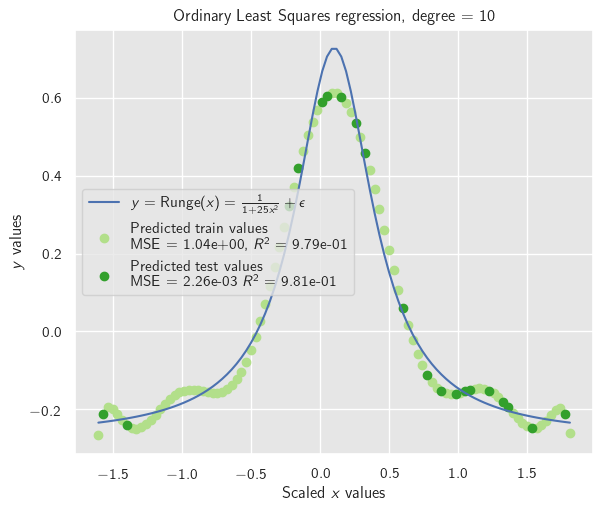

In [22]:
j = 9
deg = j + 1
cmap = sns.color_palette("Paired")


plt.figure(figsize=(17/2.54, 14/2.54))
plt.plot(x, y, label=r"$y = \mathrm{Runge}(x) = \frac{1}{1 + 25 x^2} + \epsilon$")
plt.scatter(x_train, y_pred_train_array[j], color=cmap[2], label=f"Predicted train values\n MSE = {mean_squared_error(x_train, y_pred_train_array[j]):.2e}, $R^2$ = {r2_score(y_train, y_pred_train_array[j]):.2e}")
plt.scatter(x_test, y_pred_test_array[j], color=cmap[3], label=f"Predicted test values\n MSE = {mean_squared_error(y_test, y_pred_test_array[j]):.2e} $R^2$ = {r2_score(y_test, y_pred_test_array[j]):.2e}")
plt.title(f"Ordinary Least Squares regression, degree = {deg}")
plt.xlabel(r"Scaled $x$ values")
plt.ylabel(r"$y$ values")
plt.legend()
#plt.tight_layout()
#saveplot('polyfit')

---
**a4) MSE and $R^2$ assessment**

As ac function of $p$ only:

In [139]:
MSE_train_array = [mean_squared_error(y_train, y_pred_train) for y_pred_train in y_pred_train_array]
MSE_test_array = [mean_squared_error(y_test, y_pred_test) for y_pred_test in y_pred_test_array]
r2_train_array = [r2_score(y_train, y_pred_train) for y_pred_train in y_pred_train_array]
r2_test_array = [r2_score(y_test, y_pred_test) for y_pred_test in y_pred_test_array]

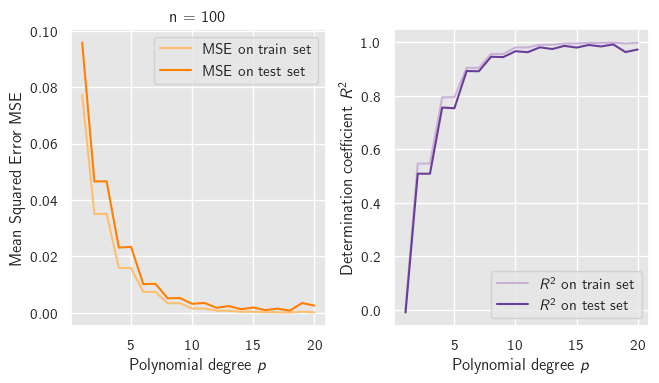

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(17/2.54, 10/2.54))
ax0 = axes[0]
ax1 = axes[1]

ax0.plot(p_range, MSE_train_array, color=cmap[6], label=r"MSE on train set")
ax0.plot(p_range, MSE_test_array, color=cmap[7], label=r"MSE on test set")
ax0.set_xlabel(r"Polynomial degree $p$")
ax0.set_ylabel(r"Mean Squared Error MSE")
ax0.set_title(f'n = {n}')
ax0.legend()

ax1.plot(p_range, r2_train_array, color=cmap[8], label=r"$R^2$ on train set")
ax1.plot(p_range, r2_test_array, color=cmap[9], label=r"$R^2$ on test set")
ax1.set_xlabel(r"Polynomial degree $p$")
ax1.set_ylabel(r"Determination coefficient $R^2$")
ax1.legend()

plt.tight_layout()
saveplot('MSE_R2_p')

As a function of both $p$ and $n$:

In [149]:
# former code for whole matrices (non-scaled, non-train-test-splitted)
n_range = np.logspace(1, 5, 5, base=10).astype(int)
x_array = [np.linspace(-1, 1, n) for n in n_range]

MSE_matrix = np.zeros((len(x_array), len(p_range)))
Rsquared_matrix = np.zeros((len(x_array), len(p_range)))

for i, xi in enumerate(x_array):
    y_true = Runge(xi)
    y_true = y_true - np.mean(y_true)  # centering
    
    for j, pj in enumerate(p_range):
        Xj = polynomial_features(xi, pj)
        betaj = OLS_params(Xj, y_true)
        y_pred = Xj @ betaj

        MSE_matrix[i,j] = mean_squared_error(y_true, y_pred)
        Rsquared_matrix[i, j] = r2_score(y_true, y_pred)

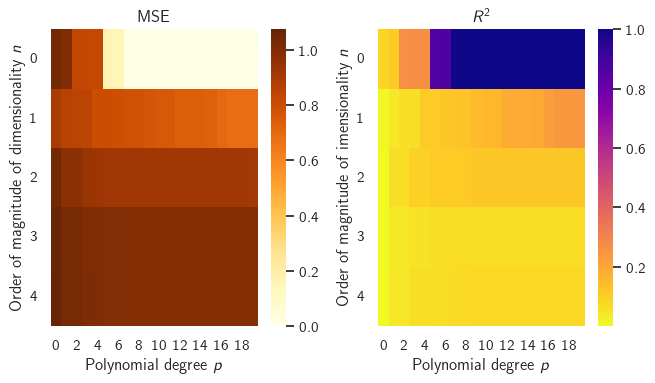

In [151]:

fig, axes = plt.subplots(1, 2, figsize=(17/2.54, 10/2.54))

sns.heatmap(MSE_matrix,
            ax=axes[0],
            cmap='YlOrBr',
            )

sns.heatmap(Rsquared_matrix,
            ax=axes[1],
            cmap='plasma_r',
            )

axes[0].set_title("MSE")
axes[0].set_ylabel(r"Order of magnitude of dimensionality $n$")
axes[0].set_xlabel(r"Polynomial degree $p$")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)

axes[1].set_title(r"$R^2$")
axes[1].set_ylabel(r"Order of magnitude of imensionality $n$")
axes[1].set_xlabel(r"Polynomial degree $p$")
axes[1].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)

plt.tight_layout()
saveplot('MSE_R2_p_n')

In [146]:
def MSE_R2_pn():
    """ Evaluates MSE and R2 as a function of complexity `p` and dimensionality `n` for OLS regression
    """

    n_range = np.logspace(5, 6, 2, base=10).astype(int)
    x_array = [np.linspace(-1, 1, n) for n in n_range]

    MSE_train_matrix = np.zeros((len(x_array), len(p_range)))
    MSE_test_matrix = np.zeros((len(x_array), len(p_range)))
    Rsquared_train_matrix = np.zeros((len(x_array), len(p_range)))
    Rsquared_test_matrix = np.zeros((len(x_array), len(p_range)))

    for i, xi in enumerate(x_array):
        
        yi = Runge(xi)
        yi = yi - np.mean(yi)  # centering
        xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, test_size=0.3)
        
        for j, pi in enumerate(p_range):
            
            Xi_train = polynomial_features(xi_train, pi)
            Xi_test = polynomial_features(xi_test, pi)

            betai = OLS_params(Xi_train, yi_train)

            yi_pred_train = linear_regression(Xi_train, betai)
            yi_pred_test = linear_regression(Xi_test, betai)
            
            MSE_train_matrix[i, j] = mean_squared_error(yi_train, yi_pred_train)
            MSE_test_matrix[i, j] = mean_squared_error(yi_test, yi_pred_test)
            Rsquared_train_matrix[i, j] = r2_score(yi_train, yi_pred_train)
            Rsquared_test_matrix[i, j] = r2_score(yi_test, yi_pred_test)
    
    return MSE_train_matrix, MSE_test_matrix, Rsquared_train_matrix, Rsquared_test_matrix

In [147]:
MSE_train_matrix, MSE_test_matrix, Rsquared_train_matrix, Rsquared_test_matrix = MSE_R2_pn()

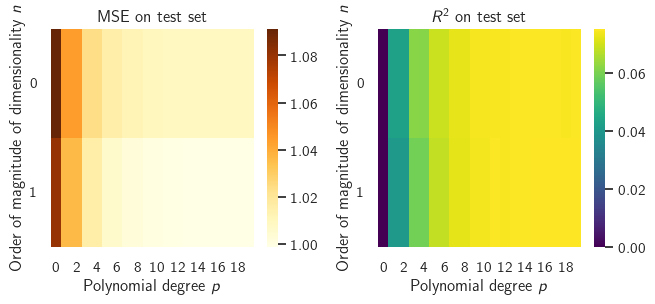

In [148]:
matrixes = [MSE_test_matrix, Rsquared_test_matrix]
titles = ["MSE on test set", r"$R^2$ on test set"]
cmaps = [sns.color_palette("YlOrBr", as_cmap=True), sns.color_palette("viridis", as_cmap=True)]

fig, axes = plt.subplots(1, 2, figsize=(17/2.54, 8/2.54))

for i, ax in enumerate(axes.flat):
    sns.heatmap(matrixes[i],
            ax=ax,
            cmap=cmaps[i],
            #origin='lower',
            #yticklabels=[1, 2, 3, 4, 5, 6]
            )
    ax.set_title(titles[i])
    ax.set_ylabel(r"Order of magnitude of dimensionality $n$")
    ax.set_xlabel(r"Polynomial degree $p$")
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
    
plt.tight_layout()

### Part b: Adding Ridge regression for the Runge function
Write your own code for the Ridge method as done in the previous exercise. The lecture notes from week 35 and 36 contain more information. Furthermore, the results from the exercise set from week 36 is something you can reuse here.

Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and analyze your results with those obtained in part a) with the OLS method. Study the dependence on $\lambda$.

In [20]:
def Ridge_params(X, y, lbda):
    """ Computes optimal parameters for Ridge regression.
        Parameters:
        :: X (matrix) = design matrix obtained with polynomial_features(x, p, intercept)
        :: y (array) = true value to be modeled
        :: lmbda (scalar) = penalty coefficient
    """
    return np.linalg.inv(X.T @ X + lbda * np.identity(X.shape[1])) @ X.T @ y

In [21]:
lbda = 0.1

betaR_array = [Ridge_params(X_train, y_train, lbda) for X_train in X_train_array]

yR_pred_train_array = [linear_regression(X_train, betaR) for X_train, betaR in zip(X_train_array, betaR_array)]
yR_pred_test_array = [linear_regression(X_test, betaR) for X_test, betaR in zip(X_test_array, betaR_array)]

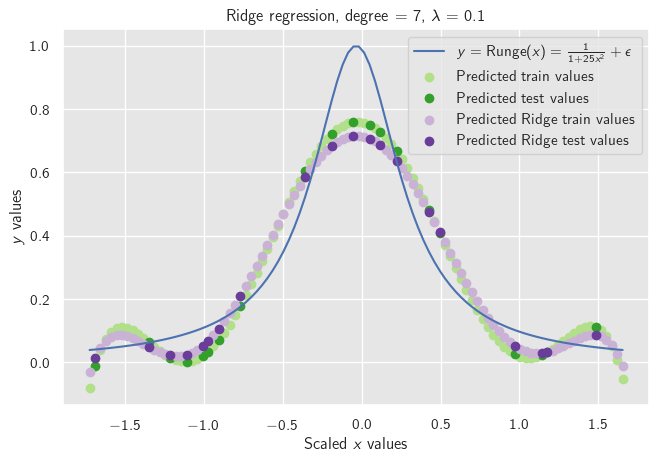

In [22]:
j = 6
deg = j + 1
plt.figure(figsize=(17/2.54, 12/2.54))
plt.plot(x, y, label=r"$y = \mathrm{Runge}(x) = \frac{1}{1 + 25 x^2} + \epsilon$")
plt.scatter(x_train, y_pred_train_array[j], color=cmap[2], label="Predicted train values")
plt.scatter(x_test, y_pred_test_array[j], color=cmap[3], label="Predicted test values")
plt.scatter(x_train, yR_pred_train_array[j], color=cmap[8], label="Predicted Ridge train values")
plt.scatter(x_test, yR_pred_test_array[j], color=cmap[9], label="Predicted Ridge test values")
plt.title(rf"Ridge regression, degree = {deg}, $\lambda$ = {lbda}")
plt.xlabel(r"Scaled $x$ values")
plt.ylabel(r"$y$ values")
plt.legend()
plt.tight_layout()
saveplot('polyfit')

In [23]:
def MSE_R2_Ridge(lbda):
    """ Evaluates MSE and R2 as a function of complexity `p` and penalty `lambda` for Ridge regression
    """

    lbda_array = np.logspace(-5, 2, 8)
    x_array = [np.linspace(-1, 1, n) for n in n_range]

    MSE_train_matrix = np.zeros((len(x_array), len(p_range)))
    MSE_test_matrix = np.zeros((len(x_array), len(p_range)))
    Rsquared_train_matrix = np.zeros((len(x_array), len(p_range)))
    Rsquared_test_matrix = np.zeros((len(x_array), len(p_range)))

    for i, xi in enumerate(x_array):
        
        yi = Runge(xi)
        xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, test_size=0.3)
        
        for j, pi in enumerate(p_range):
            
            Xi_train = polynomial_features(xi_train, pi)
            Xi_test = polynomial_features(xi_test, pi)

            betai = Ridge_params(Xi_train, yi_train, lbda)

            yi_pred_train = linear_regression(Xi_train, betai)
            yi_pred_test = linear_regression(Xi_test, betai)
            
            MSE_train_matrix[i, j] = mean_squared_error(yi_train, yi_pred_train)
            MSE_test_matrix[i, j] = mean_squared_error(yi_test, yi_pred_test)
            Rsquared_train_matrix[i, j] = r2_score(yi_train, yi_pred_train)
            Rsquared_test_matrix[i, j] = r2_score(yi_test, yi_pred_test)
    
    return MSE_train_matrix, MSE_test_matrix, Rsquared_train_matrix, Rsquared_test_matrix

In [28]:
lbda_array = np.logspace(-5, 2, 8)
n_range = np.logspace(1, 6, 6, base=10).astype(int)

MSE_train_matrix_array = []
MSE_test_matrix_array = []
Rsquared_train_matrix_array = []
Rsquared_test_matrix_array = []

for lbda in lbda_array:
    MSE_train_matrix_i, MSE_test_matrix_i, Rsquared_train_matrix_i, Rsquared_test_matrix_i = MSE_R2_Ridge(lbda)

    MSE_train_matrix_array.append(MSE_train_matrix_i)
    MSE_test_matrix_array.append(MSE_test_matrix_i)
    Rsquared_train_matrix_array.append(Rsquared_train_matrix_i)
    Rsquared_test_matrix_array.append(Rsquared_test_matrix_i)

In [29]:
len(MSE_train_matrix_array)

8

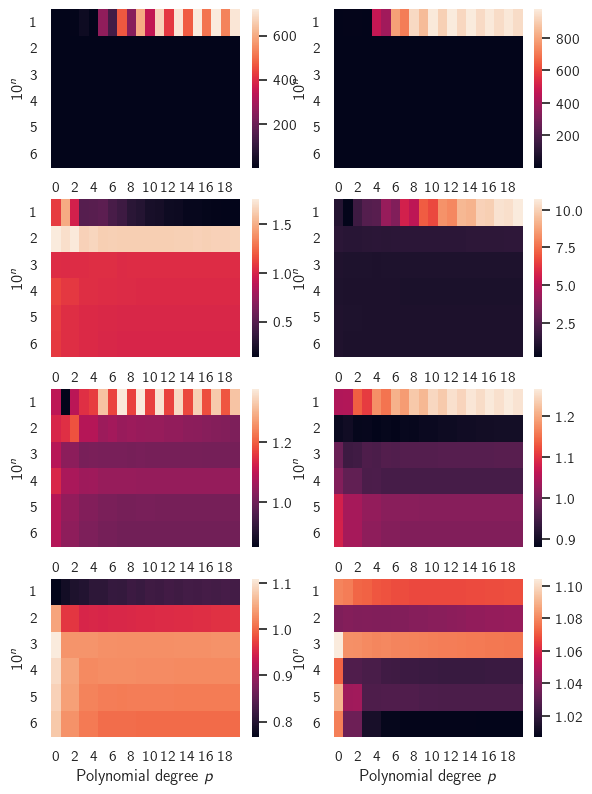

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(17/2.54, 24/2.54))

for i, ax in enumerate(axes.flat):
    sns.heatmap(MSE_test_matrix_array[i],
            ax=ax,
            #map=cmaps[i],
            #origin='lower',
            yticklabels=[1, 2, 3, 4, 5, 6]
            )
    #ax.set_title(titles[i])
    ax.set_ylabel(r"$10^n$")
    ax.set_xlabel(r"Polynomial degree $p$")
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

### Part c: Writing your own gradient descent code

Replace now the analytical expressions for the optimal parameters
$\boldsymbol{\theta}$ with your own gradient descent code. In this exercise we
focus only on the simplest gradient descent approach with a fixed
learning rate (see the exercises from week 37 and the lecture notes
from week 36).

Study and compare your results from parts a) and b) with your gradient
descent approch. Discuss in particular the role of the learning rate.

In [23]:
# defining inputs, train_test splitting
n = 100
p_range = np.arange(1, 21, 1)
#np.random.seed(1) # ensure always the same rdn numbers

x = np.linspace(-1, 1, n)
y = Runge(x, noise=False)
y = y - np.mean(y)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
pi = 4

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()

x = scaler.transform(x.reshape(-1, 1)).flatten()

In [26]:
X_train_array = [polynomial_features(x_train, p) for p in p_range]
X_test_array = [polynomial_features(x_test, p) for p in p_range]

beta_array = [OLS_params(X_train, y_train) for X_train in X_train_array]

y_pred_train_array = [linear_regression(X_train, beta) for X_train, beta in zip(X_train_array, beta_array)]
y_pred_test_array = [linear_regression(X_test, beta) for X_test, beta in zip(X_test_array, beta_array)]

In [27]:
def theta_gdOLS(X, y, eta, iterations=2000, converge = 1e-8):
    """ Computes optimal parameters for ordinary least squares regression with gradient descent.
        Parameters:
        :: X (matrix) = design matrix obtained with polynomial_features(x, p, intercept)
        :: y (array) = true value to be modeled
        :: eta (scalar) = learning rate
        :: iterations (int) = maximum number of iterations
        :: converge (scalar) = convergence criterion
    """
    
    theta = np.random.randn(X.shape[1], 1)

    for k in range(iterations):
        gradient = (2.0 / X.shape[0]) * X.T @ (X @ theta - y.reshape(-1,1))
        theta -= eta * gradient

        gradient_norm = np.linalg.norm(gradient)
        if eta * gradient_norm <= converge:
            print(f"Stop at epsilon = {gradient_norm:.2e}, iteration = {k}")
            break

    return theta



In [28]:
X_test = X_test_array[pi]
X_train = X_train_array[pi]
theta_gd = theta_gdOLS(X_train, y_train, eta=1e-2)
print(X_train.shape)
print(theta_gd)
print(beta_array[pi])

(80, 6)
[[ 0.32505429]
 [ 0.22070454]
 [-0.60648236]
 [-0.23242242]
 [ 0.15190363]
 [ 0.05531261]]
[ 0.37514814  0.10458237 -0.74655864 -0.06697859  0.20450132  0.00644521]


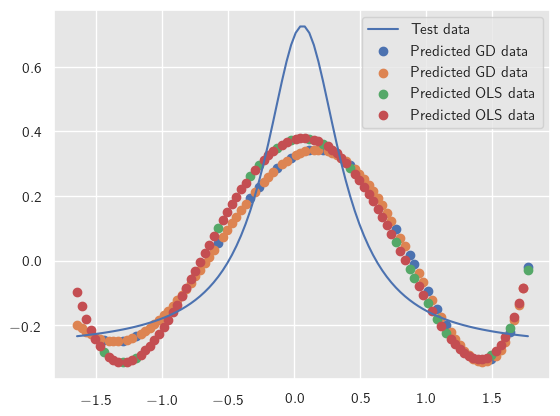

In [29]:
plt.plot(x, y, label='Test data')

plt.scatter(x_test, X_test @ theta_gd, label='Predicted GD data')
plt.scatter(x_train, X_train @ theta_gd, label='Predicted GD data')

plt.scatter(x_test, X_test @ beta_array[pi], label='Predicted OLS data')
plt.scatter(x_train, X_train @ beta_array[pi], label='Predicted OLS data')
plt.legend()

In [30]:
print(mean_squared_error(y_test, X_test @ theta_gd))
print(mean_squared_error(y_test, X_test @ beta_array[pi]))

print(r2_score(y_test, X_test @ theta_gd))
print(r2_score(y_test, X_test @ beta_array[pi]))

0.024549982412247866
0.020297030299307867
0.7553139728126034
0.7977025146395973


Best combination manually found for 2000 iterations, eta = 1e-2, p = 4

In [31]:
iteration_ranges = [500, 1000, 2000, 5000]
etas = [1e-3, 1e-4, 1e-5]
p_range = np.arange(1, 5, 1)
MSE_gd_matrix = np.zeros((len(iteration_ranges), len(etas), len(p_range)))
Rsquared_gd_matrix = np.zeros((len(iteration_ranges), len(etas), len(p_range)))

for iterations in iteration_ranges:
    for eta in etas:
        for pi in range(len(p_range)):
            X_test = X_test_array[pi]
            X_train = X_train_array[pi]

            theta_gdOLSi = theta_gdOLS(X_train, y_train, eta=eta, iterations=iterations)

            MSE_gd_matrix[iteration_ranges.index(iterations), etas.index(eta), pi] = mean_squared_error(y_test, X_test @ theta_gdOLSi)
            Rsquared_gd_matrix[iteration_ranges.index(iterations), etas.index(eta), pi] = r2_score(y_test, X_test @ theta_gdOLSi)



C:\Users\Dell\AppData\Local\Temp\ipykernel_20652\1006546947.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .9, 1])


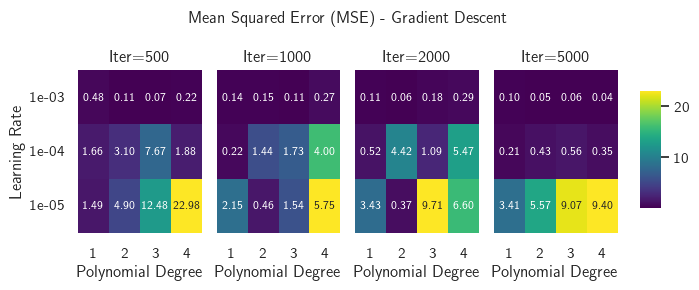

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(17/2.4, 7/2.4), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  
etas = [1e-3, 1e-4, 1e-5]

for i, ax in enumerate(axes):
    sns.heatmap(MSE_gd_matrix[i], ax=ax, cbar=(i==0), cmap='viridis', cbar_ax=cbar_ax if i==0 else None, 
    xticklabels=p_range, annot=True, fmt=".2f", annot_kws={"size": 8})
    ax.set_title(f'Iter={iteration_ranges[i]}')
    if i != 0:
        ax.set_ylabel('')
    ax.set_xlabel('Polynomial Degree')

axes[0].set_yticklabels([f"{e:.0e}" for e in etas], rotation=0)
axes[0].set_ylabel('Learning Rate')
plt.suptitle('Mean Squared Error (MSE) - Gradient Descent')
plt.tight_layout(rect=[0, 0, .9, 1])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20652\2754340748.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .9, 1])


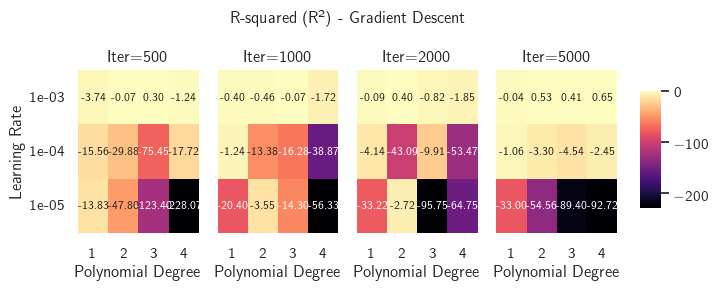

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(17/2.4, 7/2.4), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  
etas = [1e-3, 1e-4, 1e-5]

for i, ax in enumerate(axes):
    sns.heatmap(Rsquared_gd_matrix[i], ax=ax, cbar=(i==0), cmap='magma', 
                cbar_ax=cbar_ax if i==0 else None, xticklabels=p_range, annot=True, fmt=".2f", annot_kws={"size": 8})
    ax.set_title(f'Iter={iteration_ranges[i]}')
    if i != 0:
        ax.set_ylabel('')
    ax.set_xlabel('Polynomial Degree')

axes[0].set_yticklabels([f"{e:.0e}" for e in etas], rotation=0)
axes[0].set_ylabel('Learning Rate')
plt.suptitle('R-squared (R²) - Gradient Descent')
plt.tight_layout(rect=[0, 0, .9, 1])
plt.show()

### Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

---

Let's build a modulable function for choosing the learning rate update method, as well as the the linear regression method (OLS or Ridge). I will use `autograd` for computing the gradients of the cost function $C(\boldsymbol{\theta})$.

In [34]:
def CostOLS(y, X, theta):
    """ Cost function for ordinary least squares regression.
        Parameters:
        :: y (array) = true value to be modeled
        :: X (matrix) = design matrix obtained with polynomial_features(x, p, intercept)
    """
    return np.sum((y - X @ theta)**2)

def CostRidge(y, X, theta, lbda=0.1):
    """ Cost function for Ridge regression.
        Parameters:
        :: y (array) = true value to be modeled
        :: X (matrix) = design matrix obtained with polynomial_features(x, p, intercept)
        :: lbda (scalar) = penalty coefficient
    """
    return np.sum((y - X @ theta)**2) + lbda * np.sum(theta**2)

In [39]:
# learning rate update function. Considering the previous results, we will use an initial eta = 1e-3
def theta_gd_mom(X, y, regression_method='OLS', eta=1e-3, eta_update_method='Simple_momentum', 
                momentum=0.9, iterations=2000, converge = 1e-8):
    """ Computes optimal parameters for ordinary least squares regression with momentum gradient descent.
        Parameters:
        :: X (matrix) = design matrix obtained with polynomial_features(x, p, intercept)
        :: y (array) = true value to be modeled
        :: regression_method (str) = 'OLS' or 'Ridge'
        :: eta (scalar) = learning rate
        :: eta_update_method (str) = 'AdaGrad', 'RMSprop', 'ADAM' or 'Simple_momentum'
        :: iterations (int) = maximum number of iterations
        :: converge (scalar) = convergence criterion
    """

    # error for wrong input
    if regression_method != 'OLS' and regression_method != 'Ridge':
        raise ValueError(f"'regression_method' must be either 'OLS' or 'Ridge' and not {regression_method}")
    if eta_update_method not in ['AdaGrad', 'RMSprop', 'ADAM', 'Simple_momentum']:
        raise ValueError(f"'eta_update_method' must be either 'AdaGrad', 'RMSprop', 'ADAM' or 'Simple_momentum' and not {eta_update_method}")

    # initialize random theta and velocity
    theta = np.random.randn(X.shape[1], 1)
    velocity = np.zeros((X.shape[1], 1))

    # common params
    delta = 1e-8    # to avoid division by zero
    t = 0           # time step for Adam
    Giter = 0.0     # initialize sum of squared gradients for AdaGrad, RMSprop and Adam

    # defining cost function
    def cost_function():
        if regression_method == 'OLS':
            return CostOLS(y, X, theta)
        elif regression_method == 'Ridge':
            return CostRidge(y, X, theta, lbda)

    
    for k in range(iterations):
        gradient = grad(cost_function())   # compute gradient with autograd

        # update theta according to the chosen method
        if eta_update_method == 'Simple_momentum':
            velocity = momentum * velocity - eta * gradient     # simple momentum update
            update = velocity
            theta += update
        
        elif eta_update_method == 'AdaGrad': 
            # AdaGrad tracks the sum of the squares of the previous gradients
            Giter += gradient**2    # square the gradient
            adjusted_eta = eta / (delta + np.sqrt(Giter))
            update = adjusted_eta * gradient
            theta -= update

        elif eta_update_method == 'RMSprop':
            # RMSprop modificates AdaGrad by useing a moving average of squared gradients to normalize the gradient
            beta = 0.99     # discount factor that controls the averaging time of the second moment (variance of the gradient)
            Giter = beta * Giter + (1 - beta) * gradient**2
            adjusted_eta = eta / (np.sqrt(Giter) + delta)
            update = adjusted_eta * gradient
            theta -= update

        elif eta_update_method == 'ADAM':
            # Adam (Adaptive Moment Estimation) is an extension to RMSprop that also takes into account the moving average of the gradient itself
            beta1 = 0.9     # decay rate for the first moment estimate (velocity = weighted average of the past gradients)
            beta2 = 0.99    # decay rate for the second moment estimate (Giter = weighted average of the past squared gradients)
            t += 1          # time step
            
            # update first moment estimate
            velocity = beta1 * velocity + (1 - beta1) * gradient
            # update second moment estimate
            Giter = beta2 * Giter + (1 - beta2) * gradient**2
            
            # compute bias-corrected first moment estimate
            velocity_corrected = velocity / (1 - beta1**t)
            # compute bias-corrected second moment estimate
            Giter_corrected = Giter / (1 - beta2**t)
            
            adjusted_eta = eta / (np.sqrt(Giter_corrected) + delta)
            update = adjusted_eta * velocity_corrected
            theta -= update

        # convergence of the algorithm
        update_norm = np.linalg.norm(update)
        if update_norm <= converge:
            print(f"Stop at epsilon = {update_norm:.2e}, iteration = {k}")
            break

    return theta

In [41]:
theta_mom = theta_gd_mom(X_train, y_train, regression_method='OLS', eta=1e-3, eta_update_method='Simple_momentum', 
                        momentum=0.9, iterations=2000)
theta_adagrad = theta_gd_mom(X_train, y_train, regression_method='OLS', eta=1e-3, eta_update_method='AdaGrad', 
                        iterations=2000)
theta_rmsprop = theta_gd_mom(X_train, y_train, regression_method='OLS', eta=1e-3, eta_update_method='RMSprop',
                        iterations=2000)
theta_adam = theta_gd_mom(X_train, y_train, regression_method='OLS', eta=1e-3, eta_update_method='ADAM',
                        iterations=2000)

plt.plot(x, y, label='Test data')
plt.scatter(x_test, X_test @ theta_mom, label='Predicted GD-Momentum data')
plt.scatter(x_test, X_test @ theta_adagrad, label='Predicted GD-AdaGrad data')
plt.scatter(x_test, X_test @ theta_rmsprop, label='Predicted GD-RMSprop data')
plt.scatter(x_test, X_test @ theta_adam, label='Predicted GD-Adam data')

TypeError: unsupported operand type(s) for *: 'float' and 'function'

### Part e: Writing our own code for Lasso regression

LASSO regression (see lecture slides from week 36 and week 37)
represents our first encounter with a machine learning method which
cannot be solved through analytical expressions (as in OLS and Ridge regression). Use the gradient
descent methods you developed in parts c) and d) to solve the LASSO
optimization problem. You can compare your results with 
the functionalities of **Scikit-Learn**.

Discuss (critically) your results for the Runge function from OLS,
Ridge and LASSO regression using the various gradient descent
approaches.

### Part f: Stochastic gradient descent

Our last gradient step is to include stochastic gradient descent using
the same methods to update the learning rates as in parts c-e).
Compare and discuss your results with and without stochastic gradient
and give a critical assessment of the various methods.

### Part g: Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing
the **bootstrap** resampling technique.  **We will only use the simpler
ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your
test data, make first a figure similar to Fig. 2.11 of Hastie,
Tibshirani, and Friedman. Figure 2.11 of this reference displays only
the test and training MSEs. The test MSE can be used to indicate
possible regions of low/high bias and variance. You will most likely
not get an equally smooth curve! You may also need to increase the
polynomial order and play around with the number of data points as
well (see also the exercise set from week 35).

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

We assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\theta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\theta}$.

The parameters $\boldsymbol{\theta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\theta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite this in terms of a term which contains the
variance of the model itself (the so-called variance term), a term
which measures the deviation from the true data and the mean value of
the model (the bias term) and finally the variance of the noise.

That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with (we approximate $f(\boldsymbol{x})\approx \boldsymbol{y}$)

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

**Important note**: Since the function $f(x)$ is unknown, in order to be able to evalute the bias, we replace $f(\boldsymbol{x})$ in the expression for the bias with $\boldsymbol{y}$. 

The answer to this exercise should be included in the theory part of
the report.  This exercise is also part of the weekly exercises of
week 38.  Explain what the terms mean and discuss their
interpretations.

Perform then a bias-variance analysis of the Runge function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

### Part h):  Cross-validation as resampling techniques, adding more complexity

The aim here is to implement another widely popular
resampling technique, the so-called cross-validation method.  

Implement the $k$-fold cross-validation algorithm (feel free to use
the functionality of **Scikit-Learn** or write your own code) and
evaluate again the MSE function resulting from the test folds.

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code from the previous exercise. Comment and interpret your results. 

In addition to using the ordinary least squares method, you should
include both Ridge and Lasso regression in the final analysis.

## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis of parts g) and h).

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. 

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report.

## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.